# 基本信息


| 班级   | 姓名 | 学号 |
| :------- | ------ | ------ |
| 品牌2201班 | 陈炯儒  | 20211003020 |
|        | 牛嘉鑫   | 20221303863  |
|        | 林佳怡   | 20221303769  |
|        | 章子慧   | 20221303772  |

# 任务： 网络中心性的度量与解释（电视剧主演）

1. 构建“小组偏爱的演员网络”。根据组员的偏好，爬取豆瓣上不少于200部评分不低于7分的中国（含香港、澳门、台湾）电视剧的“主演”信息。凡出演同一部电视剧的演员之间，建立一条连边。连边上的权重代表演员之间的合作（即：共同出演同一部剧的）次数。

2. 构建“官方偏爱的演员网络”，根据中国电视剧三大奖项：飞天奖、金鹰奖、白玉兰奖的获奖名单，从豆瓣爬取名单上不少于200部电视剧的“主演”信息。凡主演。。。同上。

3. 用python绘制出上述两个演员合作网（有权图）
4. 计算两个网络中，各节点的四种中心性（点度中心性，中介中心性，接近中心性，特征向量中心性），并排序、输出各结果中排在前30的演员名单极其排序。同时，解读每种中心性结果的现实意义，并比较两个网络中共同出现的演员在不同网络中，各中心性指标的得分差异【提示：跨网络比较，请使用标准化的XX中心得分】。

5. 针对每种中心性度量中得分最高的5个节点，写一个循环，每次去掉一个当前得分最高的节点并输出节点排序情况。观察网络中，各节点XX中心性的排序变化情况，并在此基础上，加深理解各中心指标与网络结构之间的关系。


# 任务要求

1. 所有任务均需要提交至少两个文件：
    1. 数据
    2. 以Jupyter notebook提交的代码及全部运行结果。

2. 文件的第一部分，请以markdown模式，标注班级、组员的姓名和学号。
3. 文件的第二部分，请以markdown模式放置老师布置的任务描述。
4. 文件的第三部分，请以markdown模式，阐述任务代码的编写思路（如：1.建立一个列表/字典/元祖，存入节点对之间的指向关系；2.利用XX函数，将列表/字典/元祖转化为矩阵a；3.利用XX包的XX函数，计算矩阵a的转置矩阵，并存储为矩阵b；4. ...
5. 文件的第四部分，放置代码，并在一段代码块之前后之后，记得添加comment，说明每段代码的意图做什么【注：老师在阅读你们的代码过程中，如因缺乏注释而有不理解的地方，可能会请你们当面解释代码，再决定如何打分。】。
6. 评分标准：能正确使用markdown（第一、第二部分），思路清晰且详尽（第三部分），代码跑得通（第四部分），结果正确且解读正确（第四部分，部分作用需要解读结果，那么，请在代码后面，以Markdown模式，加入对结果的解读）

# 思路



###  数据收集

1. 利用豆瓣接口采集评分不低于的“国产剧”和“港剧”，不少于200部的电视剧列表。主要采集信息包括电视剧ID, 评分，并按照评分过滤出不低于7分的目标。
2. 利用百度百科等网站人工收集白玉兰奖、飞天奖、金鹰奖等往届获奖电视剧名称。
3. 利用豆瓣电影搜索功能，根据上述所收集的电视剧名称，采集电视剧对应的电视剧ID。
4. 上述两类电视剧信息保存到文件中，供之后使用。
2. 通过电视剧ID爬取到每部电视剧的主演信息，并保存。
    1. 演员的id到姓名的映射信息。
    2. 保存电视剧ID到演员ID列表的映射信息。

### 网络构建

1. 读取电视剧映射信息，并加入label来区分是小组喜欢的电视剧还是官方喜欢的电视剧。
2. 读取演员映射信息。
3. 读取电视剧的演员映射信息。

### 数据分析

1. 对不同的label (小组喜欢 vs 官方喜欢）
    1. 从电视剧的演员映射信息计算演员合作的次数。
    2. 利用networkx库构建网络图。`create_graph()`函数
    3. 对构建的网络图进行可视化。`plot_graph()`函数
    4. 对构建的网络图进行分析。`analysis()`函数
        1. 计算点度中心性。`networkx.degree_centrality(graph)`
        2. 计算中介中心性。`networkx.between_centrality(graph)`
        3. 计算接近中心性。`networkx.closeness_centrality(graph)`
        4. 计算特征向量中心性。`networkx.eigenvector_centrality(graph)`

# 第一阶段：数据采集

## 环境准备 


首先安装依赖的python库。

In [1]:
%pip install beautifulsoup4
%pip install networkx
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


导入所依赖的python库。

In [2]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import quote, unquote
import networkx as nx
import matplotlib.pyplot as plt

## 参数预定义

这里主要包括以下类型的参数：
1. 爬虫相关参数
2. 数据读写文件参数

In [3]:
# 首先定义一些变量

# ！！！注意
# 1.爬虫的时候需要设置自己的cookie,否则会因为反爬虫等限制请求失败
# 2.cookie是标识个人身份的数据，请严密保管自己的登录cookie
# 3.cookie需要通过在网页登录账号后，通过开发者工具获取
cookie = '''请输入自己的cookie，具体获取方法需要登录豆瓣，打开开发者工具，打开network找到一个请求，然后找到request header的cookie'''

headers = {
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
    "Sec-Ch-Ua": '''"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"''',
    "Referer": "https://movie.douban.com/",
    "Sec-Fetch-Dest": "document",
    "cookie": cookie,
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
}

GUOCHANJUAN_TAG = "国产剧"
GANGJU_TAG = "港剧"
REWARD_TAG = "三大电视奖"

REWARD_TV_FILE = "data/reward_tv_titles.csv"

GET_DOUBAN_TV_TAG_URL = "https://movie.douban.com/j/search_subjects"
SEARCH_TV_URL = "https://www.douban.com/search?cat=1002&q="
GET_ACTOR_URL = f"https://movie.douban.com/subject/"


GROUP_LIKE_LABEL = 'group_like'
OFFICIAL_LIKE_LABEL = 'official_like'

# 数据文件名，数据存储在同目录的data目录里
# REWARD_TV_FILE = "data/reward_tv_titles.csv"
REWARD_TV_LIST_FILE = "data/reward_tv_list.csv"
TV_LOOKUP_FILE = "data/tv_list.csv"
ACTOR_LOOKUP_FILE = "data/actor_list.csv"
TV_ACTORS_FILE = "data/tv_actor_list.csv"


TMP_REWARD_TV_LIST_FILE = "data/reward_tv_list.csv"
TMP_TV_LOOKUP_FILE = "data/tv_list.csv"
TMP_ACTOR_LOOKUP_FILE = "data/actor_list.csv"
TMP_TV_ACTORS_FILE = "data/tv_actor_list.csv"

## 数据采集相关函数

首先我们分别分析了豆瓣电影的三个网页，利用http请求对应地址，并使用BeautifulSoup这个爬虫工具对返回的html页面进行解析，提取我们的目标数据。

- 搜索电视剧
- 电视剧详情页



但在实际采集过程中，由于目标网站反爬虫机制，爬取过程可能并不是太稳定，且部分请求会比较耗时。

总之，本文定义了以下几个函数，基于不同的输入参数返回目标数据，包括：
- get_douban_tv_by_tag函数：根据指定的tag名称，爬取num条电视剧。
- search_tv_by_name函数：根据指定的电视剧名，爬取该电视剧在豆瓣的LINK(该LINK可以解析ID)
- get_tv_actors函数：根据指定的电视剧ID，爬取该电视剧的主演名称及ID。

另外两个函数则是其他逻辑函数。用于上层爬取数据及存储数据。

我们的采集顺序如下：
1. 爬取300部国产剧，且只保留评分不低于7分的，219部。
2. 爬取300部港剧，且只保留评分不低于7分的，234部。
3. 人工收集三大奖项获奖电视剧200部。
4. 将上述三类电视剧汇总去重，得到电视剧624部。
5. 根据上述624部电视剧的ID，爬取其对应的主演信息。

In [9]:
# 根据电视剧类型请求电视剧列表
def get_douban_tv_by_tag(tag, num = 1):
    # 爬取的目标地址接口
    url = GET_DOUBAN_TV_TAG_URL
    # 目标接口所需要的参数
    params = {
        "type": "tv",
        "tag": tag,
        "page_limit": num,
        "page_start": 0
    }
    # 使用requests这个网络请求库来请求目标URL的数据，这注意必须指定headers，否则请求会失败
    response = requests.get(url, params=params, headers = headers)
    
    if response.status_code != 200:
        print(f"request failed for tag:{tag}, 返回码:{response.status_code}")
        return []
    # 将返回的结果转为字典，并获取电视剧列表，若请求结果不存在对应列表，则默认为空列表
    dramas = response.json().get('subjects', [])

    # 定义一个列表，用来存储要采集的电视剧信息
    filtered_dramas = []
    # 循环遍历电视剧列表，提取关键信息
    for drama in dramas:
        # 获取电视剧名称
        title = drama["title"]
        
        # 获取电视剧URL，并去掉末尾的/
        url = drama["url"].strip('/')
        
        # 获取电视剧评分，这里拿到的是字符串
        rate = drama["rate"]
        
        # 如果拿到是空结果，或者评分小于7，则丢弃这条数据，继续处理下一条数据
        if rate == '' or float(rate) < 7:
            print(f"没有评分或者评分低于7, 电视剧：{title}, 评分:{rate}")
            continue
        # 获取电视剧ID
        did = drama["id"]
        
        # 创建一个列表并包含上述数据，最后添加filtered_dramas这个返回变量中
        filtered_dramas.append([tag, did, title, rate, url])
        
        # 下面是用来记录爬虫进度的打印信息，每采集到5个电视剧打印一条提示
        if len(filtered_dramas) % 5 == 0:
            print(f"get_douban_tv_by_tag for {tag}, size {len(filtered_dramas)} dramas")
    # 返回采集的电视剧信息列表
    return filtered_dramas


# 根据电视剧名称搜索获取电视剧ID(link里包含ID信息)，返回结果为电视剧访问的link
def search_tv_by_name(search_text):
    
    # 由于搜索文本可能包含特殊符号，或者是中文，因此需要先对其进行转化
    quoted_search_text = quote(search_text)

    # 构造请求的链接
    url = f"{SEARCH_TV_URL}{quoted_search_text}"

    # 发送请求
    r = requests.get(url, headers=headers)
    
    status = r.status_code
    # 若请求成功，则返回码是200
    if status == 200:
        # 构造一个BeautifulSoup解析器
        soup = BeautifulSoup(r.content.decode('utf-8'),"html.parser",from_encoding="utf-8")
        
        # 先找到class名为result-list的div标签块
        a = soup.find('div', class_='result-list')
        if a is None:
            print(f"fail soup find for {search_text}")
            return None
        num = len(a)
        if num == 0:
            print('request succ, but null result')
        else:
            href = a.find('a', href=True)
            link = href['href'].split('?url=')[-1].split('%2F&query=')[0]
            uq_link = unquote(link).strip('/')
            return uq_link
    else:
        print(f"Request failed, code:{status}")
    return None

# 根据电视剧ID获取其主演信息，并返回到一个列表中
def get_tv_actors(tv_id):
    # 构造请求链接
    url = f"{GET_ACTOR_URL}{tv_id}"

    r = requests.get(url, headers=headers)
    status = r.status_code
    return_actors = []
    if status == 200:
        soup = BeautifulSoup(r.content.decode('utf-8'),"html.parser")
        a = soup.find('div', class_='subject clearfix')
        if a is not None:
            actors = a.find('span', class_='actor')
            if actors is not None:
                attrs = actors.find('span', class_='attrs')
                if attrs is not None: 
                    hrefs = attrs.find_all('a', href=True)
                    if hrefs is not None:
                        for item in hrefs:
                            aname = item.get_text()
                            aid = item['href'].strip('/')
                            return_actors.append((aname, aid))
    else:
        print(f"request failed for tv_id:{tv_id}, status:{status}")
    return return_actors


# 读取三大电视剧奖获得列表的电视剧名称，分别搜索其电视剧LINK/ID，并按照一定格式存储到一个列表中
def get_reward_tv(num):
    with open(REWARD_TV_FILE, 'r') as f:
        result = []
        for line in f.readlines():
            title = line.strip()
            link = search_tv_by_name(title)
            if link is not None:
                tv_id = link.strip().strip('/').split('/')[-1]
                result.append([REWARD_TAG, tv_id, title, '10', link])
            if len(result) % 5 == 0:
                print(f"get_reward_tv size:{len(result)} dramas")
            if len(result) >= num:
                break
        return result


# 将定义好格式的电视剧信息列表，追加存储到文件中        
def tv_write(data, tag, label):
    # 这里我们用了tmp_这个文件前缀，是担心再次运行爬虫程序时候由于不稳定影响结果，可能导致之前已经爬取到的数据混乱或丢失
    tmp_file = TMP_TV_LOOKUP_FILE
    with open(tmp_file, 'a+') as f:
        for tv in data:
            [_, tv_id, title, rate, link] = tv
            # 最后存储文件会用逗号作为字段分隔符，因此，预先将title这个字段里的逗号替换成&
            ntitle = title.replace(',', '&')
            simple_tv = [tv_id, ntitle, tag, label]
            # 使用join函数将上述列表转为逗号分隔的字符串，最后写入文件中
            f.write(','.join(simple_tv) + '\n')

In [13]:
# 简单地测试一下上面几个函数
print("============测试 get_douban_tv_by_tag======")
ta = get_douban_tv_by_tag("国产剧", 3)
print(ta)

print("============测试 search_tv_by_name======")
tb = search_tv_by_name("一念关山")
print(tb)

print("============测试 get_tv_actors======")
tc = get_tv_actors("35797771")
print(tc)

print("============测试 get_reward_tv======")
td = get_reward_tv(1)
print(td)

============测试 get_douban_tv_by_tag======
没有评分或者评分低于7, 电视剧：神隐, 评分:
没有评分或者评分低于7, 电视剧：鸣龙少年, 评分:
[['国产剧', '35797771', '一念关山', '7.3', 'https://movie.douban.com/subject/35797771']]
============测试 search_tv_by_name======
https://movie.douban.com/subject/35797771
============测试 get_tv_actors======
[('刘诗诗', 'celebrity/1274533'), ('刘宇宁', 'celebrity/1401585'), ('方逸伦', 'celebrity/1359360'), ('何蓝逗', 'celebrity/1376538'), ('陈昊宇', 'celebrity/1351561'), ('常华森', 'celebrity/1437324'), ('王艳', 'celebrity/1274509'), ('吕行', 'celebrity/1313870'), ('李欢', 'celebrity/1349341'), ('陈宥维', 'celebrity/1386145'), ('陈都灵', 'celebrity/1342249'), ('王一哲', 'celebrity/1397908'), ('陈小纭', 'celebrity/1361294'), ('张芷溪', 'celebrity/1323727'), ('黄梦莹', 'celebrity/1349244'), ('张帆', 'celebrity/1420285'), ('叶青', 'celebrity/1315746'), ('叶筱玮', 'celebrity/1371589'), ('原若航', 'celebrity/1439518'), ('吴弘', 'celebrity/1342009'), ('张垒', 'celebrity/1276088'), ('苏梦芸', 'celebrity/1452637'), ('张乔耳', 'celebrity/1440942'), ('周陆啦', 'celebrity/14189

## 爬取300部国产剧和300部港剧

In [ ]:
# 爬取300部国产剧
NUM = 300
gcj_list = get_douban_tv_by_tag(GUOCHANJUAN_TAG, NUM)
gj_list = get_douban_tv_by_tag(GANGJU_TAG, NUM)

# 写电视剧id/name映射文件
tv_write(gcj_list, GUOCHANJUAN_TAG, GROUP_LIKE_LABEL)
tv_write(gj_list, GANGJU_TAG, GROUP_LIKE_LABEL)


## 爬取获奖电视剧的ID信息

In [ ]:
# 爬取获奖电视剧的ID信息，本步骤耗时较长
# 由于网站有反爬虫限制，爬取一次后存储结果，之后直接读取这个爬取结果，不再重复爬取
reward_list = get_reward_tv(NUM)  

reward_list = []
NUM = 200
with open(REWARD_TV_LIST_FILE, 'r') as f:
        result = []
        for line in f.readlines():
            item = line.strip().split(',')
            tv_id = item[0]
            title = item[1]
            link = item[2]
            reward_list.append([REWARD_TAG, tv_id, title, '10', link])
            if len(reward_list) % 5 == 0:
                print(f"get_reward_tv size:{len(reward_list)} dramas")
            if len(reward_list) >= NUM:
                break

tv_write(reward_list, REWARD_TAG, OFFICIAL_LIKE_LABEL)

In [14]:
# 定义一个集合来汇总并去重上述电视剧
tv_id_set = set()
with open(TV_LOOKUP_FILE, 'r') as f:
    for line in f.readlines():
        item = line.strip().split(',')
        tv_id_set.add(item[0])

# 将集合转为列表
tv_id_list = list(tv_id_set)
print(f"总电视剧部数：{len(tv_id_list)}")

总电视剧部数：624


## 爬取主演信息

In [ ]:
# 爬取上述电视剧的主演列表

# 定义一个字典，存储演员ID到演员名的映射
actor_map = {}
# 定义一个字典，存储电视剧ID到主演们ID的映射
tv2actor_simple = {}
for tv_id in tv_id_list:
    # 爬取指定电视剧ID的主演信息
    v = get_tv_actors(tv_id)
    # 若返回空列表，则跳过处理下一个电视剧ID
    if len(v) == 0:
        continue
    
    # 定义一个列表，存储演员ID
    aid_list = []
    
    # 遍历演员列表，解析演员ID和演员名，分别存储到列表和字典中
    for item in v:
        [name, aid] = item
        aid = aid.split('/')[-1]
        actor_map[aid] = name
        aid_list.append(aid)
    # 将电视剧ID到主演们ID的映射存储到目标字典中
    tv2actor_simple[tv_id] = aid_list
    
    # 记录爬取进度，每5个打印一次
    if len(tv2actor_simple) % 5 == 0:
        print(f"get_tv_actors size:{len(tv2actor_simple)} dramas")

print(f"actor size: {len(actor_map)}")

In [ ]:
# 写演员映射表
def actor_write(data):
    with open(TMP_ACTOR_LOOKUP_FILE, 'w') as f:
        for k, v in data.items():
            v = v.replace(',', '&')
            f.write(f'{k},{v}\n')
actor_write(actor_map)
        

In [ ]:
# 写电视剧的演员列表
with open(TMP_TV_ACTORS_FILE, 'w') as f:
    for k, v in tv2actor_simple.items():
        v_str = ' '.join(v)
        f.write(f'{k},{v_str}\n')

# 第二部分：网络构建和分析

In [15]:
# 读取演员列表id->name
# 定义一个字典，用来存储演员ID到演员名称的映射
actor_id2name = {}
with open(ACTOR_LOOKUP_FILE, 'r') as f:
    # 循环遍历读取文件的每一行
    for line in f.readlines():
        # 先按照逗号把演员ID和演员名分隔开，存储为一个列表
        item = line.strip().split(',')
        actor_id = item[0]
        actor_name = item[1]
        actor_id2name[actor_id] = actor_name

In [16]:
# 读取电视剧列表id->title
# 定义一个字典，用来存储电视剧ID到电视剧名称的映射
tv_id2title = {}

# 定义一个字典，用来存储小组偏爱的电视剧ID 和 官方偏爱的电视剧ID
# 用于后续区分两个网络的节点使用
label2tvlist = {'group_like': {}, 'official_like': {}}
with open(TV_LOOKUP_FILE, 'r') as f:
    # 循环遍历读取文件的每一行
    for line in f.readlines():
        # 先按照逗号把电视剧ID和电视剧名称等信息分隔开，存储为一个列表
        item = line.strip().split(',')
        # 列表的第一个元素是电视剧ID，第二个元素是电视剧名称
        tv_id = item[0]
        tv_name = item[1]
        # 列表的第三个元素是标签，分别有三个值，“国产剧”， “港剧”，“三大电视奖”
        tag = item[2]
        # 列表的第四个元素是标记，分别有两个值，“official_like”， “group_like” 标识小组偏爱或者官方偏爱
        label = item[3]
        # 将结果存储在提前定义好的字典中，key:演员ID， value:演员名
        tv_id2title[tv_id] = tv_name
        # 将演员ID加入对应的标记字典中
        label2tvlist[label][tv_id] = 1

In [17]:
# 读取电视剧的演员列表
# 定义一个字典，用来存储电视剧ID到演员ID列表的映射
tv2actor_id = {}
with open(TV_ACTORS_FILE, 'r') as f:
    # 循环遍历读取文件的每一行
    for line in f.readlines():
        # 先按照逗号把电视剧ID和演员ID列表分隔开，存储为一个2个元素的列表
        [k, v] = line.strip().split(',')
        # 然后按照空格把多个演员ID分隔开存储为列表
        actors = v.split(' ')
        # 将结果存储在提前定义好的字典中，key:电视剧ID， value:演员列表
        tv2actor_id[k] = actors

In [18]:
print(f'tv2actor_id size:{len(tv2actor_id)}')
print(f'tv_id2title size:{len(tv_id2title)}')
print(f'actor_id2name size:{len(actor_id2name)}')


tv2actor_id size:617
tv_id2title size:624
actor_id2name size:7846


In [42]:
####### task 1&2:构建网络 #########

def create_graph(label):
    # 计算同时出演电视剧的次数
    edges = {}

    tmp = set()
    G = nx.Graph()
    count = 1
    for k, v in tv2actor_id.items():
        if k not in label2tvlist[label]:
            continue
        for i in range(len(v)):
            vi = v[i]
            G.add_node(vi, name=actor_id2name[vi])
            for j in range(len(v)):
                if i < j:
                    vj = v[j]
                    G.add_node(vj, name=actor_id2name[vj])
                    if v[i] not in edges:
                        edges[vi] = {}
                    if vj not in edges[vi]:

                        edges[vi][vj] = 0
                    edges[vi][vj] += 1
        
        # 这里为了减少计算量，我们只选取200部电视剧
        if count >= 200:
            break
        count += 1


    
    for i in edges:
        for j in edges[i]:
            G.add_edge(i, j, weight=edges[i][j])
            G.add_edge(j, i, weight=edges[i][j])
    return G

group_like_actor_network = create_graph(GROUP_LIKE_LABEL)
print(group_like_actor_network)


official_like_actor_network = create_graph(OFFICIAL_LIKE_LABEL)
print(official_like_actor_network)

# 把两个网络写到文件中，第一次执行的时候写文件，备份数据，后面再执行的时候可以注释掉这两行
nx.write_weighted_edgelist(group_like_actor_network, "data/group_like_actors.weighted.edgelist")
nx.write_weighted_edgelist(official_like_actor_network, "data/official_like_actors.weighted.edgelist")


Graph with 3461 nodes and 114240 edges
Graph with 3217 nodes and 118630 edges


## Task 1&2:绘制网络

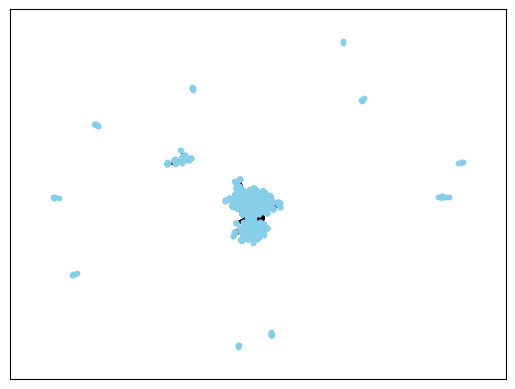

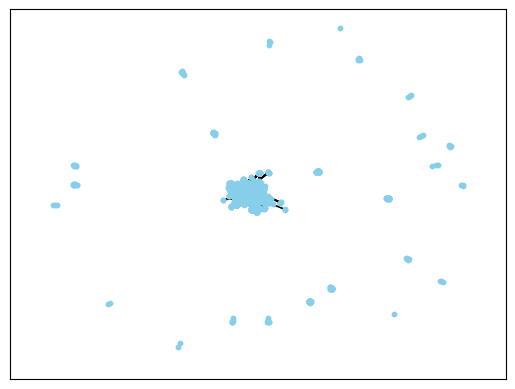

In [43]:
def plot_graph(G):
    nx.draw_networkx(G, with_labels=False, node_size = 10, node_color = 'skyblue')
    plt.axis('on')
    plt.show()

plot_graph(group_like_actor_network)
plot_graph(official_like_actor_network)

# Task 4:计算各类中心性

In [44]:
# 定义四个中心性的标签名
import os
import pandas as pd
types = ['Degree', 'Betweenness', 'Closeness', 'Eigenvector']

# 将中心性结果存储到文件中
def save_centralities_to_file(centrality, tag, fp):
    for idx, score in centrality.items():
        fp.write(f'{tag},{idx},{score}\n')

# 从文件中读取中心性结果
def read_centrality_from_file(filename):
    # 利用pandas库的read_csv函数从文件读取数据到pandas的dataframe结构中
    df = pd.read_csv(filename, header=None, names=['tag','id','score'])
    
    # 定义一个函数，获取不同类型的中心性数据，并返回一个字典，idx用来确定是Degree或者Betweenness或者其他
    def get_target_centrality(idx):
        part_df = df.loc[df['tag'] == types[idx]][['id', 'score']]
        return part_df.set_index('id')['score'].to_dict()
    
    #获取Degree中心性
    degree_centrality = get_target_centrality(0)
    #获取Betweenness
    betweenness_centrality = get_target_centrality(1)
    #获取Closeness中心性
    closeness_centrality = get_target_centrality(2)
    #获取Eigenvector中心性
    eigenvector_centrality = get_target_centrality(3)
    return degree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality
    
            
# 计算中心性指标
def calculate_centralities(G, filename):
    
    # 为了节省计算时间，如果我们之前已经计算过并且存储在文件中了，则直接从文件读取中心性结果
    if os.path.exists(filename):
        print("从文件中读取中心性结果")
        return read_centrality_from_file(filename)

    # 若文件不存在，则创建文件
    fp = open(filename, 'w')
    print("计算degree_centrality")
    # 调用networkx的degree_centrality函数
    degree_centrality = nx.degree_centrality(G)
    save_centralities_to_file(degree_centrality, types[0], fp)
    
    
    print("计算betweenness_centrality")
    # 调用networkx的betweenness_centrality函数
    betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
    save_centralities_to_file(betweenness_centrality, types[1], fp)
    
    
    print("计算closeness_centrality")
    # 调用networkx的closeness_centrality函数
    closeness_centrality = nx.closeness_centrality(G)
    save_centralities_to_file(closeness_centrality,  types[2], fp)
    
    
    print("计算eigenvector_centrality")
    # 调用networkx的eigenvector_centrality函数
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
    save_centralities_to_file(eigenvector_centrality,  types[3], fp)
    
    # 最后确保关闭文件句柄
    fp.close()
    
    return degree_centrality, betweenness_centrality, closeness_centrality, eigenvector_centrality

# 根据中心性TOP的节点映射演员名
def map_actors_name(top_actors):
    new_top = []
    for item in top_actors:
        (idx, score) = item
        new_top.append((idx, actor_id2name[idx], score))
    return new_top

# 根据中心性分数排序获取TOP30的节点
def top_actors(centrality, n=30):
    return sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:n]

# 对计算的中心性结果进行处理，便于输出后查看理解
def analysis(centralities_):
    # 取top-30名演员，并映射其姓名
    result = []
    for i, centrality in enumerate(types):
        rank = 1
        display_ranklist = []
        for (idx, name, score) in map_actors_name(top_actors(centralities_[i])):
            display_ranklist.append((centrality, rank, name, idx, score))
            rank += 1
        result.append(display_ranklist)
    return result

print(f'计算{GROUP_LIKE_LABEL} 演员网络的各类中心性:')
group_centralities_ = calculate_centralities(group_like_actor_network, './data/group_like_actor_network_centralities.csv')


print(f'计算{OFFICIAL_LIKE_LABEL} 演员网络的各类中心性:')
official_centralities_ = calculate_centralities(official_like_actor_network, './data/official_like_actor_network_centralities.csv')

print(f'获取{GROUP_LIKE_LABEL} 演员网络的各类中心性结果TOP30:')
group_top_actors = analysis(group_centralities_)

print(f'获取{OFFICIAL_LIKE_LABEL} 演员网络的各类中心性结果TOP30:')
official_top_actors = analysis(official_centralities_)

g_top_30_actor_nodes = set()
o_top_30_actor_nodes = set()
print("最后打印两个网络的中心性结果（同时保存数据到文件中，便于后续查看）")
with open("data/centrality_result.csv", 'w') as result_fp:
    result_fp.write(f'中心性,排名,小组偏爱演员,官方偏爱演员\n')
    for i in range(4):
        group_centrality = group_top_actors[i]
        official_centrality = official_top_actors[i]
        for j in range(30):
            (centrality, rank, g_name, g_idx, g_score) = group_centrality[j]
            (_, _, o_name, o_idx, o_score) = official_centrality[j]
            g_top_30_actor_nodes.add(g_idx)
            o_top_30_actor_nodes.add(o_idx)
            result_fp.write(f'{centrality},{rank},{g_name},{o_name}\n')
            print(f'|{centrality}|{rank}|{g_name}|{o_name}|')

计算group_like 演员网络的各类中心性:
计算degree_centrality
计算betweenness_centrality
计算closeness_centrality
计算eigenvector_centrality
计算official_like 演员网络的各类中心性:
计算degree_centrality
计算betweenness_centrality
计算closeness_centrality
计算eigenvector_centrality
获取group_like 演员网络的各类中心性结果TOP30:
获取official_like 演员网络的各类中心性结果TOP30:
最后打印两个网络的中心性结果（同时保存数据到文件中，便于后续查看）
|Degree|1|徐敏|丁勇岱|
|Degree|2|马吟吟|王伍福|
|Degree|3|房子斌|唐国强|
|Degree|4|李宏磊|马晓伟|
|Degree|5|蒋志光|刘之冰|
|Degree|6|马国明|孙维民|
|Degree|7|张陆|谢钢|
|Degree|8|毛晓彤|刘奕君|
|Degree|9|金世佳|卢奇|
|Degree|10|陈牧扬|岳红|
|Degree|11|张圣岳|王宏|
|Degree|12|韩姝妹|王永泉|
|Degree|13|魏惠文|许文广|
|Degree|14|刘钧|徐永革|
|Degree|15|邵卓尧|侯祥玲|
|Degree|16|李斌|张喜前|
|Degree|17|黄毅|夏天|
|Degree|18|谢承颖|张龄心|
|Degree|19|岳旸|郭连文|
|Degree|20|佘诗曼|魏伟|
|Degree|21|刘琳|刘敏涛|
|Degree|22|国歌|靳东|
|Degree|23|王红梅|张页石|
|Degree|24|朱剑峰|冯晖|
|Degree|25|刘美彤|柯蓝|
|Degree|26|刘桂芳|张嘉益|
|Degree|27|刘天龙|高鑫|
|Degree|28|韦家雄|王凯|
|Degree|29|朱泳腾|苏丽|
|Degree|30|张柏嘉|丁海峰|
|Betweenness|1|佘诗曼|丁勇岱|
|Betweenness|2|苗侨伟|谢钢|
|Betweenness|3|王健|蒋雯丽|
|Betweenness|4|刘松仁|

### 结果解释

首先在电视剧演员合作网络中，这四个中心性指标代表的现实意义是：

1. **Degree Centrality (度中心性)**：这个指标衡量一个演员与多少其他演员有合作关系。一个度中心性高的演员意味着他/她与很多其他演员有合作，表明他/她在电视剧行业中很活跃且具有广泛的联系网。

2. **Betweenness Centrality (介数中心性)**：这个指标衡量一个演员在其他演员之间合作关系的桥梁作用。高介数中心性的演员常常处于不同演员群体或社交圈的中心位置，意味着他们在连接不同演员群体方面发挥着重要作用。

3. **Closeness Centrality (接近中心性)**：这个指标衡量一个演员与网络中所有其他演员的平均距离。接近中心性高的演员意味着他/她与网络中的其他演员较为接近，可以较快地与大多数演员建立联系。

4. **Eigenvector Centrality (特征向量中心性)**：这个指标不仅考虑了一个演员的直接联系数量，还考虑了这些联系的重要性。如果一个演员与多个重要或中心性高的演员有联系，那么他/她的特征向量中心性也会较高。这意味着他/她不仅与众多演员有联系，而且这些联系都是影响力较大的演员。

结合本课题中计算出来的各中心性结果，我们可以得出以下几个推断。
1. 对于点度中心性来讲，

| 中心性类型   | 排名 | 小组偏爱 | 官方偏爱 |
| :------- | ------ | :----- | :----- |
|Degree|1|徐敏|丁勇岱|
|Degree|2|马吟吟|王伍福|
|Degree|3|房子斌|唐国强|
|Degree|4|李宏磊|马晓伟|
|Degree|5|蒋志光|刘之冰|
|Degree|6|马国明|孙维民|
|Degree|7|张陆|谢钢|
|Degree|8|毛晓彤|刘奕君|
|Degree|9|金世佳|卢奇|
|Degree|10|陈牧扬|岳红|

徐敏、马吟吟、房子斌、李宏磊、将志光、马国明等人均是活跃的演员。而对官方偏爱的电视剧演员网络来讲，我们可以发现获奖的这些电视剧的演员大都是我们如今所熟悉的老戏骨，他们在各大优秀电视剧出演。他们都与很多演员建立了合作关系。

2. 而介数中心性的排位，则体现了这些演员在演员合作网络中的桥梁作用。一方面这些演员能够排序在top，说明本身的演艺经历；从另一个侧面，我们也可以推断这些演员出演的电视剧类型丰富，因此他们能够连接不同演群。如我们非常熟知的佘诗曼、蒋雯丽，刘奕君等人。

| 中心性类型   | 排名 | 小组偏爱 | 官方偏爱 |
| :------- | ------ | :----- | :----- |
| Betweenness | 1 | 佘诗曼 | 丁勇岱 |
|Betweenness|2|苗侨伟|谢钢|
|Betweenness|3|王健|蒋雯丽|
|Betweenness|4|刘松仁|萨日娜|
|Betweenness|5|檀健次|唐国强|
|Betweenness|6|林夏薇|刘奕君|
|Betweenness|7|黄智贤|张喜前|
|Betweenness|8|沈保平|岳红|
|Betweenness|9|徐敏|张嘉益|
|Betweenness|10|张晓晨|刘之冰|

3. 再来看接近中心性这个指标，说明这些演员与影响力大的演员合作密切，比如年轻人相对熟知的檀健次，刘琳，毛晓彤，李依晓，刘奕君等人。
| 中心性类型   | 排名 | 小组偏爱 | 官方偏爱 |
| :------- | ------ | :----- | :----- |
|Closeness|1|沈保平|丁勇岱|
|Closeness|2|常铖|刘奕君|
|Closeness|3|侯岩松|唐国强|
|Closeness|4|檀健次|王永泉|
|Closeness|5|刘琳|王伍福|
|Closeness|6|毛晓彤|丁海峰|
|Closeness|7|黑子|张嘉益|
|Closeness|8|李泽锋|谢钢|
|Closeness|9|李依晓|许文广|
|Closeness|10|张陆|王宏|

4. 特征向量中心性: 这个指标更多可以衡量演员在这个合作网络中的综合地位。排在TOP的演员基本都是互相合作的经历会高于其他演员。

| 中心性类型   | 排名 | 小组偏爱 | 官方偏爱 |
| :------- | ------ | :----- | :----- |
|Eigenvector|1|马吟吟|马晓伟|
|Eigenvector|2|房子斌|王伍福|
|Eigenvector|3|徐敏|刘之冰|
|Eigenvector|4|李宏磊|唐国强|
|Eigenvector|5|金世佳|孙维民|
|Eigenvector|6|张圣岳|丁勇岱|
|Eigenvector|7|韩姝妹|卢奇|
|Eigenvector|8|李斌|侯祥玲|
|Eigenvector|9|黄毅|苏丽|
|Eigenvector|10|张陆|林津锋|


5. 综合起来看，官方偏爱的电视剧演员合作网络的上述4个指标排名TOP10的演员变化相比小组偏爱的要小一些，一方面可以推测是因为获奖类电视剧的题材等比较固定，另一方面也可能取决于收集的数据包含很多有年代的剧目。而小组偏爱网络这边，因为我们选取了国产剧和港剧两者，采集数据时默认是按照热度。因此在四个指标中的结果上看起来会有更大变化。

In [45]:
# 对比两个网络的公共结点在各自网络中的中心性分数

# 首先，对两个网络的中心性结果进行标准化
from statistics import mean, stdev
def normalize_centrality(centralities):
    result = []
    for i, centrality in enumerate(types):
        m = mean(centralities[i].values())
        std = stdev(centralities[i].values())
        if std == 0:
            if m == 0:
                result.append(centralities[i])
            else:
                centrality_normalized = {k: v / m for k, v in centralities[i].items()}
                result.append(centrality_normalized)
        else:
            centrality_normalized = {k: (v - m) / std for k, v in centralities[i].items()}
            result.append(centrality_normalized)
    return result

print("对网络的各个中心性进行标准化")
g_norm_central = normalize_centrality(group_centralities_)
o_norm_central = normalize_centrality(official_centralities_)

对网络的各个中心性进行标准化


In [46]:
top30_common_nodes = g_top_30_actor_nodes.intersection(o_top_30_actor_nodes)
print("top30_common_nodes: ", top30_common_nodes)

print("基于网络的标准化中心性分数选取TOP30个节点")
norm_group_top_actors = analysis(g_norm_central)
norm_official_top_actors = analysis(o_norm_central)


# 打印两个网络的标准化后的中心性结果
with open("data/norm_centrality_result.csv", 'w') as result_fp:
    result_fp.write(f'中心性,排名,小组偏爱演员,官方偏爱演员\n')
    for i, centrality in enumerate(types):
        group_centrality = norm_group_top_actors[i]
        official_centrality = norm_official_top_actors[i]
        for j in range(30):
            (centrality, rank, g_name, g_idx, g_score) = group_centrality[j]
            (_, _, o_name, o_idx, o_score) = official_centrality[j]
            result_fp.write(f'{centrality},{rank},{g_name},{o_name}\n')
            print(f'{centrality}\t{rank}\t{g_name}\t{o_name}')


# 获取两个网络中共同结点的排名以及中心性分数等
g_top30_common_centrality = {}
o_top30_common_centrality = {}
for i, centrality in enumerate(types):
    group_centrality = norm_group_top_actors[i]
    official_centrality = norm_official_top_actors[i]
    g_c_central = {}
    o_c_central = {}
    for j in range(30):
        (_, _, _, g_idx, _) = group_centrality[j]
        (_, _, _, o_idx, _) = official_centrality[j]
        if g_idx in top30_common_nodes:
            g_c_central[g_idx] = group_centrality[j]
        if o_idx in top30_common_nodes:
            o_c_central[o_idx] = official_centrality[j]
    g_top30_common_centrality[centrality] = g_c_central
    o_top30_common_centrality[centrality] = o_c_central

# 打印对比
for i, centrality in enumerate(types):
    group_centrality = norm_group_top_actors[i]
    official_centrality = norm_official_top_actors[i]
    g_c_central = g_top30_common_centrality[centrality]
    o_c_central = o_top30_common_centrality[centrality]
    nodes = set(g_c_central.keys()).intersection(set(o_c_central.keys()))
    for idx in nodes:
        (centrality, g_rank, g_name, g_idx, g_score) = g_c_central[idx]
        (o_centrality, o_rank, _, _, o_score) = g_c_central[idx]
        print(f'{centrality}\t{g_name}({g_idx})\t{g_rank}->{o_rank}\t{g_score}->{o_score}')
                

top30_common_nodes:  {'1313991', '1327329', '1355471', '1116446'}
基于网络的标准化中心性分数选取TOP30个节点
Degree	1	徐敏	丁勇岱
Degree	2	马吟吟	王伍福
Degree	3	房子斌	唐国强
Degree	4	李宏磊	马晓伟
Degree	5	蒋志光	刘之冰
Degree	6	马国明	孙维民
Degree	7	张陆	谢钢
Degree	8	毛晓彤	刘奕君
Degree	9	金世佳	卢奇
Degree	10	陈牧扬	岳红
Degree	11	张圣岳	王宏
Degree	12	韩姝妹	王永泉
Degree	13	魏惠文	许文广
Degree	14	刘钧	徐永革
Degree	15	邵卓尧	侯祥玲
Degree	16	李斌	张喜前
Degree	17	黄毅	夏天
Degree	18	谢承颖	张龄心
Degree	19	岳旸	郭连文
Degree	20	佘诗曼	魏伟
Degree	21	刘琳	刘敏涛
Degree	22	国歌	靳东
Degree	23	王红梅	张页石
Degree	24	朱剑峰	冯晖
Degree	25	刘美彤	柯蓝
Degree	26	刘桂芳	张嘉益
Degree	27	刘天龙	高鑫
Degree	28	韦家雄	王凯
Degree	29	朱泳腾	苏丽
Degree	30	张柏嘉	丁海峰
Betweenness	1	佘诗曼	丁勇岱
Betweenness	2	苗侨伟	谢钢
Betweenness	3	王健	蒋雯丽
Betweenness	4	刘松仁	萨日娜
Betweenness	5	檀健次	唐国强
Betweenness	6	林夏薇	刘奕君
Betweenness	7	黄智贤	张喜前
Betweenness	8	沈保平	岳红
Betweenness	9	徐敏	张嘉益
Betweenness	10	张晓晨	刘之冰
Betweenness	11	周德华	王劲松
Betweenness	12	蔡少芬	王源
Betweenness	13	侯岩松	王伍福
Betweenness	14	李佳航	焦刚
Betweenness	15	朱泳腾	王奎荣
Betweenness	16	于明加	殷桃
Betweenness	17	胡杏儿	何政军
Betweenness	18	焦晃	濮存昕
Be

从上述结果来看，

## Task 5:循环移除得分最高的节点，观察网络top结点的变化

In [158]:

# 定义一个函数来移除得分最高的节点并输出节点排序情况
def remove_top_nodes_and_rank(network, specified):
    ranks = []
    G = network.copy()
    centrality = None
    if specified == 'Degree':
        centrality = nx.degree_centrality(G)
    elif specified == 'Betweenness':
        centrality = nx.betweenness_centrality(G, weight='weight')
    elif specified == 'Closeness':
        centrality = nx.closeness_centrality(G)
    elif specified == 'Eigenvector':
        centrality = nx.eigenvector_centrality(G, max_iter=1000)
    # 排序节点，获取得分最高的节点
    sorted_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    ranks.append([actor_id2name[node] for node, _ in sorted_nodes][:30])
    top_nodes = [node for node, _ in sorted_nodes][:5]
    print(top_nodes)
    for i in range(5):
        # 移除得分最高的节点
        G.remove_node(top_nodes[i])
        # 计算中心性
        centrality = None
        if specified == 'Degree':
            centrality = nx.degree_centrality(G)
        elif specified == 'Betweenness':
            centrality = nx.betweenness_centrality(G, weight='weight')
        elif specified == 'Closeness':
            centrality = nx.closeness_centrality(G)
        elif specified == 'Eigenvector':
            centrality = nx.eigenvector_centrality(G, max_iter=1000)
        # 排序节点
        sorted_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
        # 保存当前的排序
        ranks.append([actor_id2name[node] for node, _ in sorted_nodes[:30]])
    return ranks


def analysis_specified_centrality(network, specified):
# 计算并保存每种中心性指标下的节点排序变化
    centrality_ranks = remove_top_nodes_and_rank(network, specified)
    print(f'============={specified}=============')
    print(f'rank, loop1 -> loop2 -> loop3 -> loop4 -> loop5')
    for i in range(30):
        print(f'{i+1},{centrality_ranks[0][i]} -> {centrality_ranks[1][i]} -> {centrality_ranks[2][i]} -> {centrality_ranks[3][i]} -> {centrality_ranks[4][i]}')


def analysis_network(network):
    for specified in types:
        analysis_specified_centrality(network, specified)

print(f'小组喜爱演员网络分析------------------------------->')      
analysis_network(group_like_actor_network)

print(f'官方喜爱演员网络分析------------------------------->')  
analysis_network(official_like_actor_network)

小组喜爱演员网络分析------------------------------->
['1313546', '1352249', '1316392', '1342986', '1315056']
=============Degree=============
rank, loop1 -> loop2 -> loop3 -> loop4 -> loop5
1,徐敏 -> 马吟吟 -> 房子斌 -> 蒋志光 -> 蒋志光
2,马吟吟 -> 房子斌 -> 李宏磊 -> 李宏磊 -> 马国明
3,房子斌 -> 李宏磊 -> 蒋志光 -> 马国明 -> 张陆
4,李宏磊 -> 蒋志光 -> 马国明 -> 张陆 -> 毛晓彤
5,蒋志光 -> 马国明 -> 张陆 -> 毛晓彤 -> 金世佳
6,马国明 -> 张陆 -> 毛晓彤 -> 金世佳 -> 陈牧扬
7,张陆 -> 毛晓彤 -> 金世佳 -> 陈牧扬 -> 魏惠文
8,毛晓彤 -> 金世佳 -> 陈牧扬 -> 魏惠文 -> 张圣岳
9,金世佳 -> 陈牧扬 -> 魏惠文 -> 张圣岳 -> 韩姝妹
10,陈牧扬 -> 张圣岳 -> 张圣岳 -> 韩姝妹 -> 刘钧
11,张圣岳 -> 韩姝妹 -> 韩姝妹 -> 刘钧 -> 邵卓尧
12,韩姝妹 -> 魏惠文 -> 刘钧 -> 邵卓尧 -> 李斌
13,魏惠文 -> 刘钧 -> 邵卓尧 -> 李斌 -> 黄毅
14,刘钧 -> 邵卓尧 -> 李斌 -> 黄毅 -> 岳旸
15,邵卓尧 -> 李斌 -> 黄毅 -> 岳旸 -> 佘诗曼
16,李斌 -> 黄毅 -> 岳旸 -> 佘诗曼 -> 谢承颖
17,黄毅 -> 岳旸 -> 谢承颖 -> 谢承颖 -> 刘琳
18,谢承颖 -> 谢承颖 -> 佘诗曼 -> 刘琳 -> 国歌
19,岳旸 -> 佘诗曼 -> 刘琳 -> 国歌 -> 王红梅
20,佘诗曼 -> 刘琳 -> 国歌 -> 王红梅 -> 朱剑峰
21,刘琳 -> 国歌 -> 王红梅 -> 朱剑峰 -> 刘美彤
22,国歌 -> 王红梅 -> 朱剑峰 -> 刘美彤 -> 刘桂芳
23,王红梅 -> 朱剑峰 -> 刘美彤 -> 刘桂芳 -> 刘天龙
24,朱剑峰 -> 刘美彤 -> 刘桂芳 -> 刘天龙 -> 韦家雄
25,刘美彤 -> 刘桂芳 -> 刘天龙 -> 韦

对于degree_centrality排名来说，每次去掉一个top结点后，普遍地变化是之后的节点的排名上升一位。